# Visualization

As the return value of a sliced dataset is a `xarray.DataArray` instead of a `numpy.ndarray` plotting features of `xarray` is used. For more information about `xarray` see https://docs.xarray.dev/en/stable/

In [1]:
import h5rdmtoolbox as h5tbx
h5tbx.use(None)

import matplotlib.pyplot as plt
import numpy as np

Failed to import module h5tbx


In [2]:
with h5tbx.File() as h5:
    dsx = h5.create_dataset('x', data=np.linspace(0, 10, 20), attrs=dict(units='mm', long_name='x'), make_scale=True)
    dsy = h5.create_dataset('y', data=np.linspace(0, 5, 10), attrs=dict(units='mm', long_name='y'), make_scale=True)
    dsz = h5.create_dataset('z', data=np.linspace(0, 3, 4), attrs=dict(units='mm', long_name='z'), make_scale=True)
    h5.create_dataset('data', data=np.random.random((10, 20)), attrs=dict(units='m/s', long_name='velocity'), attach_scales=(dsy, dsx))
    
    xx, yy, zz = np.meshgrid(dsy.values[:], dsz.values[:], dsx.values[:])
    
    h5.create_dataset('u', data=np.sin(xx), attrs=dict(units='m/s', long_name='x_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.create_dataset('v', data=yy, attrs=dict(units='m/s', long_name='y_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.create_dataset('w', data=np.ones((4, 10, 20)), attrs=dict(units='m/s', long_name='z_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.dump()    

## Xarray plots

`xarray` comes with a lot of useful plotting features:

### Line plots

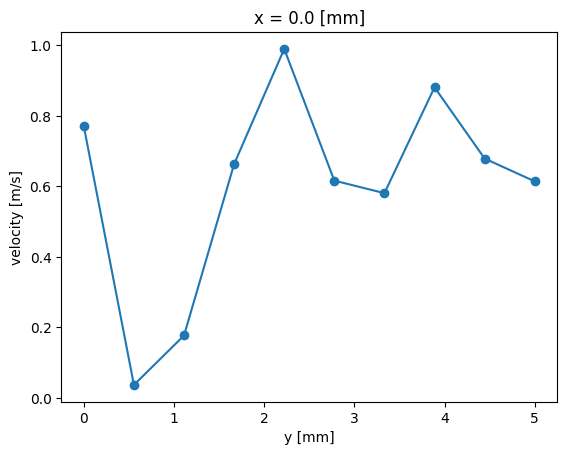

In [3]:
with h5tbx.File(h5.hdf_filename) as h5:
    h5.dump()
    d = h5['data'][:, 0]
    d.plot.line(marker='o')

### 2D plots

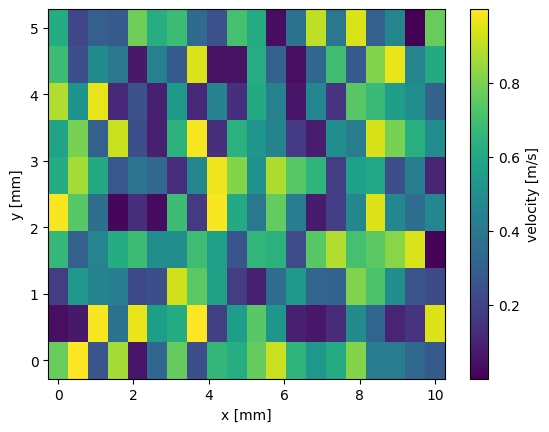

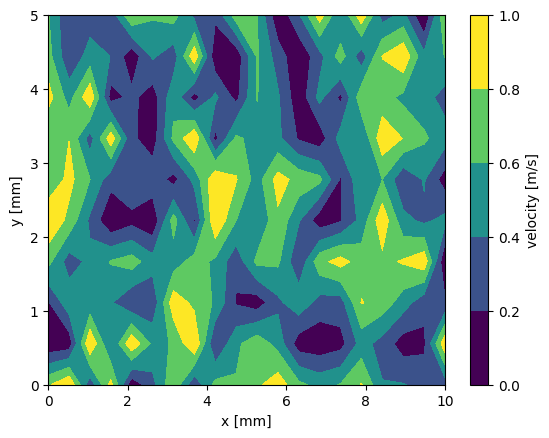

<Figure size 640x480 with 0 Axes>

In [4]:
with h5tbx.File(h5.hdf_filename) as h5:
    # some plotting
    plt.figure()
    h5['data'][:].plot()
    plt.show()
    
    plt.figure()
    h5['data'][:].plot.contourf()
    plt.figure()
    plt.show()

### Histograms

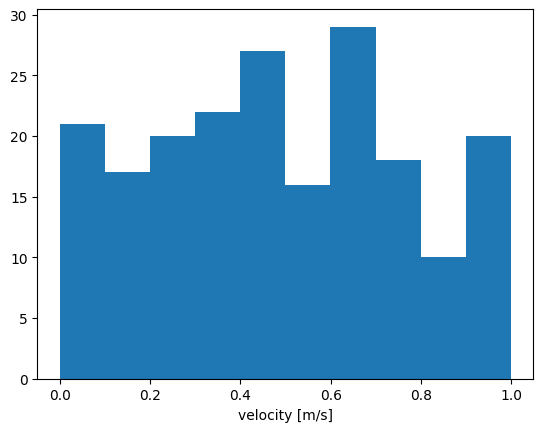

In [5]:
with h5tbx.File(h5.hdf_filename) as h5:
    h5['data'][:].plot.hist()
    plt.show()

## Vector plotting with h5rdmtoolbox and xarray

The toolbox provides a `Vector` accessory (see also [section "Extensions"](Extensions.ipynb])), which constructs a `xarray` dataset:

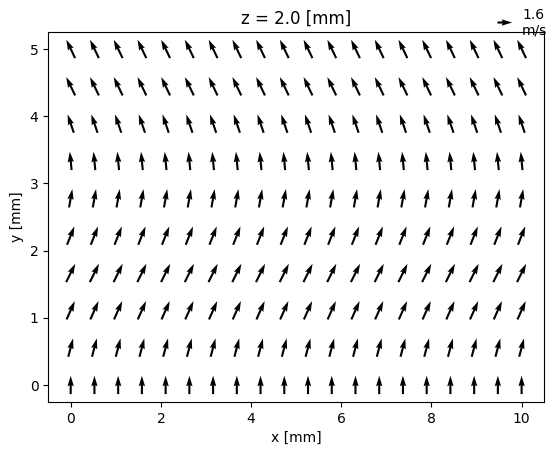

In [6]:
from h5rdmtoolbox.extensions import vector
with h5tbx.File(h5.hdf_filename) as h5:
    ds = h5.Vector(u=h5.u, v=h5.v)
    ds[2, :, :].plot.quiver(x='x', y='y', u='u', v='v')

## Scatterhist

In [12]:
from h5rdmtoolbox.extensions import scatterhist
with h5tbx.File(mode='w') as h5:
    h5.create_dataset('u_vel', data=np.random.normal(loc=0, scale=2.0, size=(50, 100)),
                     attrs={'units': 'm/s'})
    h5.create_dataset('v_vel', data=np.random.normal(loc=4, scale=5.0, size=(50, 100)),
                     attrs={'units': 'm/s'})
    ds = h5.Vector(u=h5.u_vel, v=h5.v_vel)[()]
    # ds = h5.get_xr_dataset(u=h5.u_vel[:, :], v=h5.v_vel[:, :])

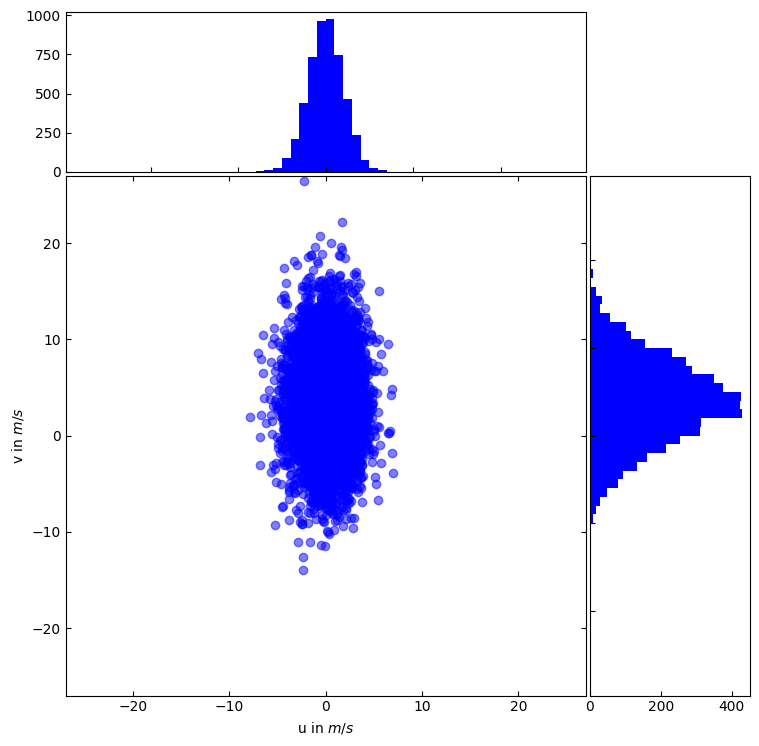

In [13]:
ds.scatterhist('u', 'v', alpha=0.5, color='b', density=False)